# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st 


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
megaline_calls_df = pd.read_csv("megaline_calls.csv") 
megaline_internet_df = pd.read_csv("megaline_internet.csv") 
megaline_messages_df = pd.read_csv("megaline_messages.csv")
megaline_plans_df = pd.read_csv("megaline_plans.csv") 
megaline_users_df = pd.read_csv("megaline_users.csv")


In [3]:
megaline_calls_df.head() 

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
megaline_internet_df.head() 

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [5]:
megaline_messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
megaline_plans_df.head() 

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
megaline_users_df.head() 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Preparar los datos

## Tarifas

In [8]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
megaline_plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [9]:
# Imprime una muestra de los datos para las tarifas
megaline_plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir datos

"Conclusion: no hay datos por manipular "

## Enriquecer los datos

"no hay factores utiles que agregar"

## Usuarios/as

In [12]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users_df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
# Imprime una muestra de datos para usuarios
megaline_users_df.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Corregir los datos

In [14]:
# saber si hay duplicados 
megaline_users_df.duplicated().sum()

0

In [15]:
# valores nulos 
megaline_users_df.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [23]:
#Convierte la columna churn_date a formato de fecha
megaline_users_df["churn_date"] = pd.to_datetime(megaline_users_df["churn_date"], format='%Y-%m-%d')
#Crea una nueva columna churned que indica con True=cancelacion  y False  = sigue activo  
megaline_users_df["churned"] = megaline_users_df["churn_date"].notnull()


In [24]:
megaline_users_df.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
churned         0
dtype: int64

In [26]:
#Convierte la columna a formato de fecha
megaline_users_df["reg_date"] = pd.to_datetime(megaline_users_df["reg_date"], format='%Y-%m-%d')
megaline_users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,False


In [27]:
megaline_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   churned     500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB


### Enriquecer los datos

Crearemos una columna llamada mes para saber mas de el tiempo de uso y poder relacionar los datos 

In [28]:
megaline_users_df["month"] = pd.DatetimeIndex(megaline_users_df["reg_date"]).month
megaline_users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,False,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,False,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,False,5


## Llamadas

In [29]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

megaline_calls_df.head() 

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [30]:
# Imprime una muestra de datos para las llamadas
megaline_calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


### Corregir los datos

In [32]:
# saber si tenemos duplicados 
megaline_calls_df.duplicated().sum()

0

In [33]:
# saber si tiene nulos 
megaline_calls_df.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [35]:
# redondea hacia arriba cada valor decimal al entero más cercano
megaline_calls_df["duration"] = np.ceil(megaline_calls_df["duration"])
#Convierte la columna a formato de fecha
megaline_calls_df["call_date"] = pd.to_datetime(megaline_calls_df["call_date"], format='%Y-%m-%d')
megaline_calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


In [36]:
megaline_calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Creamos una columna month 

In [37]:
megaline_calls_df["month"] = pd.DatetimeIndex(megaline_calls_df["call_date"]).month
megaline_calls_df.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12


## Mensajes

In [38]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [39]:
# Imprime una muestra de datos para los mensajes
megaline_messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corregir los datos

In [40]:
# saber si tenemos duplicados 
megaline_messages_df.duplicated().sum()

0

In [42]:
# saber si tenemos valores nulos 
megaline_messages_df.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [45]:
#Convierte la columna a formato de fecha
megaline_messages_df["message_date"]= pd.to_datetime(megaline_messages_df["message_date"], format='%Y-%m-%d')


In [46]:
megaline_messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Agregamos columna month 

In [47]:
megaline_messages_df["month"] = pd.DatetimeIndex(megaline_messages_df["message_date"] ).month
megaline_messages_df.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [48]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [49]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corregir los datos

In [50]:
#saber si tenemos duplicados 
megaline_internet_df.duplicated().sum()

0

In [53]:
# Saber si tenemos valores nulos 
megaline_internet_df.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [55]:
#Convierte la columnaa formato de fecha
megaline_internet_df["session_date"] = pd.to_datetime(megaline_internet_df["session_date"],format='%Y-%m-%d')

### Enriquecer los datos

agregar columna mes 

In [56]:
megaline_internet_df["month"] = pd.DatetimeIndex(megaline_internet_df["session_date"]).month
megaline_internet_df.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [57]:
megaline_internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


## Estudiar las condiciones de las tarifas

In [58]:
#condiciones de la tarifa 
megaline_plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [59]:
# Calcula el número de llamadas hechas por cada usuario al mes. 
megaline_calls_df = megaline_calls_df.groupby(["user_id","month"])["duration"].count().reset_index()
megaline_calls_df.head()

,user_id,month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [60]:
# Calcula la cantidad de minutos usados por cada usuario al mes. 
megaline_calls = megaline_calls_df.groupby(["user_id","month"])["duration"].sum().reset_index()
megaline_calls.head()

,user_id,month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [61]:
# Calcula el número de mensajes enviados por cada usuario al mes. 
megaline_messages = megaline_messages_df.groupby(["user_id","month"])["message_date"].count().reset_index()
megaline_messages = megaline_messages.rename(columns={"message_date": "num_mensajes"})
megaline_messages.head()

,user_id,month,num_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [62]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. 
megaline_internet = megaline_internet_df.groupby(["user_id","month"])["mb_used"].sum().reset_index()
megaline_internet.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


### Juntar los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.

In [63]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
x = megaline_internet.merge(megaline_messages)
y_tabla_total = x.merge(megaline_calls)
y_tabla_total.head()


,user_id,month,mb_used,num_mensajes,duration
0,1000,12,1901.47,11,16
1,1001,8,6919.15,30,27
2,1001,9,13314.82,44,49
3,1001,10,22330.49,53,65
4,1001,11,18504.30,36,64


In [64]:
# Añade la información de la tarifa
tarifa = y_tabla_total.merge(megaline_users_df)
tarifa.head()


,user_id,month,mb_used,num_mensajes,duration,first_name,last_name,age,city,reg_date,plan,churn_date,churned
0,1000,12,1901.47,11,16,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False
1,1001,8,6919.15,30,27,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False
2,1002,10,6552.01,15,11,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,False
3,1004,5,6547.21,7,21,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,False
4,1006,11,2068.37,15,2,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,True


In [68]:
#añadimos plans 
tarifa_1 = tarifa.merge(megaline_plans_df,left_on="plan",right_on="plan_name")
tarifa_1

,user_id,month,mb_used,num_mensajes,duration,first_name,last_name,age,city,reg_date,...,churn_date,churned,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,1901.47,11,16,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,...,NaT,False,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,6919.15,30,27,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,...,NaT,False,50,15360,500,20,10,0.03,0.03,surf
2,1002,10,6552.01,15,11,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,...,NaT,False,50,15360,500,20,10,0.03,0.03,surf
3,1004,5,6547.21,7,21,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,...,NaT,False,50,15360,500,20,10,0.03,0.03,surf
4,1006,11,2068.37,15,2,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,...,2018-12-18,True,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1479,11,4123.18,1,83,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,...,NaT,False,50,15360,500,20,10,0.03,0.03,surf
182,1480,12,8805.51,51,70,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,...,NaT,False,50,15360,500,20,10,0.03,0.03,surf
183,1481,12,1265.78,3,6,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,...,NaT,False,50,15360,500,20,10,0.03,0.03,surf
184,1486,12,20312.83,10,45,Sang,Solis,29,"Orlando-Kissimmee-Sanford, FL MSA",2018-12-05,...,NaT,False,50,15360,500,20,10,0.03,0.03,surf


In [69]:
# columnas deseadas 
columnas_deseadas = [ "user_id","plan","month","mb_used","num_mensajes","duration", "messages_included", "mb_per_month_included", "minutes_included","usd_monthly_pay","usd_per_gb","usd_per_message","usd_per_minute"]
tabla_filtrada_tarifa_1 = tarifa_1[columnas_deseadas]
tabla_filtrada_tarifa_1.head()

,user_id,plan,month,mb_used,num_mensajes,duration,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,ultimate,12,1901.47,11,16,1000,30720,3000,70,7,0.01,0.01
1,1001,surf,8,6919.15,30,27,50,15360,500,20,10,0.03,0.03
2,1002,surf,10,6552.01,15,11,50,15360,500,20,10,0.03,0.03
3,1004,surf,5,6547.21,7,21,50,15360,500,20,10,0.03,0.03
4,1006,ultimate,11,2068.37,15,2,1000,30720,3000,70,7,0.01,0.01


## Calcular los ingresos mensuales por usuario 
 -resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos.
 
 -multiplica el resultado por el valor del plan de llamadas.
 
 -añade la tarifa mensual en función del plan de llamadas).


In [70]:
# Calcula el ingreso mensual para cada usuario
def ingreso_mensual_xuser_id(dato):
    mensaje_extra = 0
    llamadas_extra = 0
    datos_extra = 0

    if dato["num_mensajes"] > dato["messages_included"]:
        mensaje_extra = (dato["num_mensajes"] - dato["messages_included"]) * dato["usd_per_message"]
    if dato["duration"] > dato["minutes_included"]:
        llamadas_extra = (dato["duration"] - dato["minutes_included"]) * dato["usd_per_minute"]
    if dato["mb_used"] > dato["mb_per_month_included"]:
        datos_extra = ((dato["mb_used"] - dato["mb_per_month_included"]) / 1024) * dato["usd_per_gb"]

    ingresos_mensuales = (dato["usd_monthly_pay"] + mensaje_extra + llamadas_extra + datos_extra )
    
    return ingresos_mensuales            

In [71]:
# aplicamos la funcion creando otra columna 
tarifa_1["ingresos_mensuales"] = tarifa_1.apply(ingreso_mensual_xuser_id, axis=1)


tarifa_1.tail()

,user_id,month,mb_used,num_mensajes,duration,first_name,last_name,age,city,reg_date,...,churned,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,ingresos_mensuales
181,1479,11,4123.18,1,83,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,...,False,50,15360,500,20,10,0.03,0.03,surf,20.00000
182,1480,12,8805.51,51,70,Jasper,Buchanan,46,"St. Louis, MO-IL MSA",2018-12-13,...,False,50,15360,500,20,10,0.03,0.03,surf,20.03000
183,1481,12,1265.78,3,6,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,...,False,50,15360,500,20,10,0.03,0.03,surf,20.00000
184,1486,12,20312.83,10,45,Sang,Solis,29,"Orlando-Kissimmee-Sanford, FL MSA",2018-12-05,...,False,50,15360,500,20,10,0.03,0.03,surf,68.36748
185,1497,12,11106.55,50,54,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,...,False,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00000


In [72]:
tarifa_1[["user_id","plan","ingresos_mensuales"]]


,user_id,plan,ingresos_mensuales
0,1000,ultimate,70.00000
1,1001,surf,20.00000
2,1002,surf,20.00000
3,1004,surf,20.00000
4,1006,ultimate,70.00000
...,...,...,...
181,1479,surf,20.00000
182,1480,surf,20.03000
183,1481,surf,20.00000
184,1486,surf,68.36748


## Estudia el comportamiento de usuario

In [76]:
tarifa_1.describe()

,user_id,month,mb_used,num_mensajes,duration,age,reg_date,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,ingresos_mensuales
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186,11,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1234.290323,8.215054,9058.535376,24.876344,35.360215,45.548387,2018-08-21 05:40:38.709677312,2018-12-01 19:38:10.909090816,346.236559,20149.677419,1279.569892,35.591398,9.064516,0.023763,0.023763,39.768514
min,1000.000000,1.000000,92.310000,1.000000,2.000000,18.000000,2018-01-01 00:00:00,2018-10-13 00:00:00,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,20.000000
25%,1113.250000,6.000000,4125.942500,8.000000,12.000000,31.250000,2018-06-10 00:00:00,2018-11-17 12:00:00,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,20.000000
50%,1220.500000,9.000000,8285.870000,17.000000,30.000000,46.000000,2018-09-09 00:00:00,2018-12-18 00:00:00,50.000000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,20.000000
75%,1354.750000,11.000000,12721.510000,31.750000,51.000000,61.000000,2018-11-05 18:00:00,2018-12-20 00:00:00,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,70.000000
max,1497.000000,12.000000,27575.540000,125.000000,129.000000,75.000000,2018-12-30 00:00:00,2018-12-31 00:00:00,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,103.466895
std,142.771909,3.014737,5915.376700,24.745642,26.614045,16.712524,NaN,NaN,441.265781,7134.570947,1161.225740,23.224515,1.393471,0.009290,0.009290,24.810073


### Llamadas

In [78]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
llamadas_promedio = tarifa_1.groupby(['plan', 'month'])['duration'].mean().reset_index()
llamadas_promedio_f= llamadas_promedio.round(2)
llamadas_promedio_f.head()

,plan,month,duration
0,surf,1,42.00
1,surf,2,21.00
2,surf,3,37.80
3,surf,4,40.73
4,surf,5,23.20


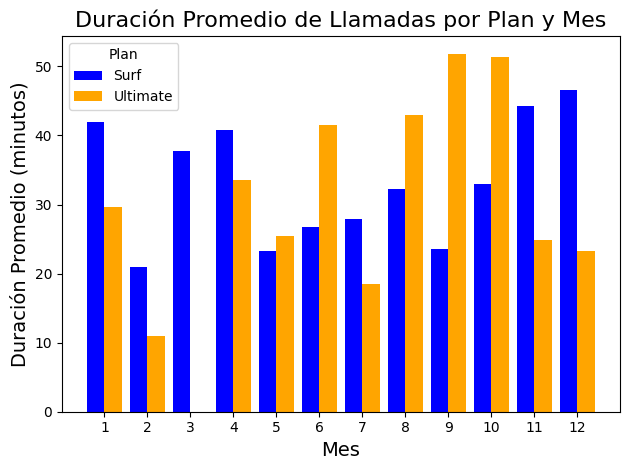

In [74]:

pivot_data = llamadas_promedio_f.pivot(index="month", columns="plan", values="duration").fillna(0)


meses = pivot_data.index
ancho = 0.40
x = np.arange(len(meses))  


plt.bar(x - ancho/2, pivot_data["surf"], width=ancho, label="Surf", color='blue')
plt.bar(x + ancho/2, pivot_data["ultimate"], width=ancho, label="Ultimate", color='orange')
plt.title("Duración Promedio de Llamadas por Plan y Mes", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Duración Promedio (minutos)", fontsize=14)
plt.xticks(x, meses)  
plt.legend(title="Plan")
plt.tight_layout()
plt.show()


si hay cambios de un plan a otro dependiendo el mes 

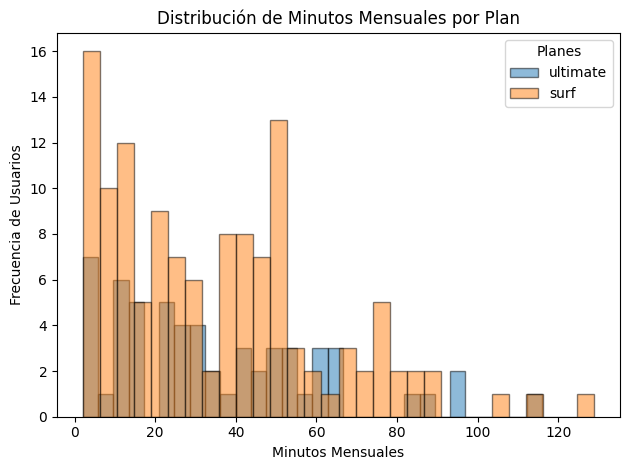

In [80]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.


planes = tarifa_1["plan_name"].unique() 

for plan in planes:
    datos_plan = tarifa_1[tarifa_1["plan_name"] == plan]
    plt.hist(datos_plan["duration"], bins=30, alpha=0.5, label=plan, edgecolor='black')


plt.title("Distribución de Minutos Mensuales por Plan")
plt.xlabel("Minutos Mensuales")
plt.ylabel("Frecuencia de Usuarios")
plt.legend(title="Planes")
plt.tight_layout()
plt.show()


la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.

In [81]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_duracion = tarifa_1["duration"].mean()
print("Media de la duracion mensual de llamadas:",media_duracion.round(2))


Media de la duracion mensual de llamadas: 35.36


In [82]:
varianza_duracion = tarifa_1["duration"].var()
print("varianza de la duracion mensual de llamadas:", varianza_duracion.round(2))

varianza de la duracion mensual de llamadas: 708.31


In [83]:
# Calcular media y varianza por plan
estadisticas_por_plan = tarifa_1.groupby("plan_name")["duration"].agg(["mean", "var"])
print(estadisticas_por_plan)


                mean         var
plan_name                       
surf       35.320312  712.613127
ultimate   35.448276  711.128857


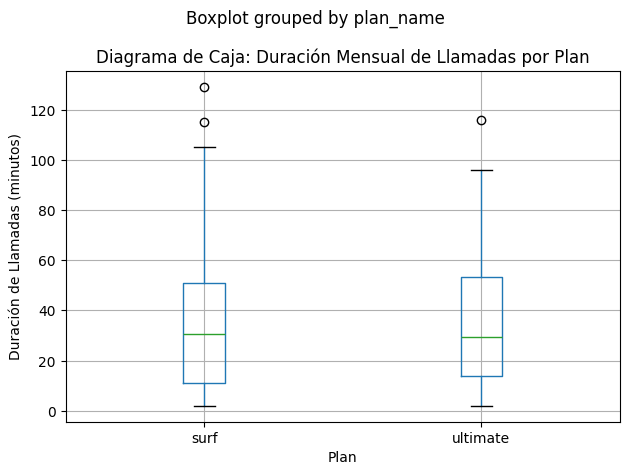

In [85]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

tarifa_1.boxplot(column="duration", by="plan_name", )


plt.title("Diagrama de Caja: Duración Mensual de Llamadas por Plan")
plt.xlabel("Plan")
plt.ylabel("Duración de Llamadas (minutos)")
plt.tight_layout()
plt.show()



al parecer los planes estan muy parejos 

### Mensajes

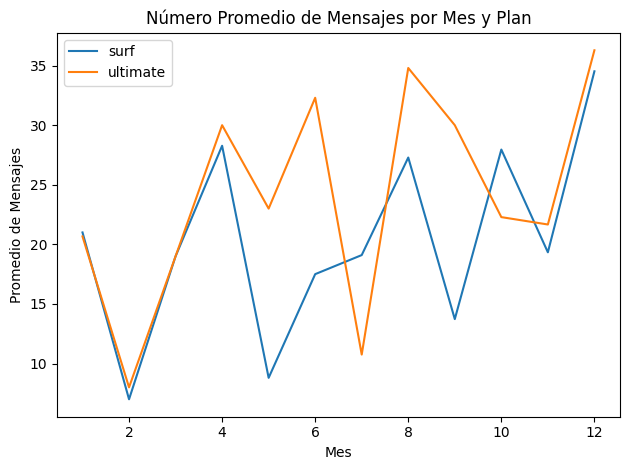

In [87]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan


mensajes_promedio = tarifa_1.groupby(["plan_name", "month"])["num_mensajes"].mean().reset_index()


for plan in mensajes_promedio["plan_name"].unique():
    datos_plan = mensajes_promedio[mensajes_promedio["plan_name"] == plan]
    plt.plot(datos_plan["month"], datos_plan["num_mensajes"], label=plan)

plt.title("Número Promedio de Mensajes por Mes y Plan")
plt.xlabel("Mes")
plt.ylabel("Promedio de Mensajes")
plt.legend()
plt.tight_layout()
plt.show()



In [88]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

internet_promedio = tarifa_1.groupby("plan_name")["mb_used"].mean().reset_index()

internet_promedio

,plan_name,mb_used
0,surf,9241.557188
1,ultimate,8654.625172


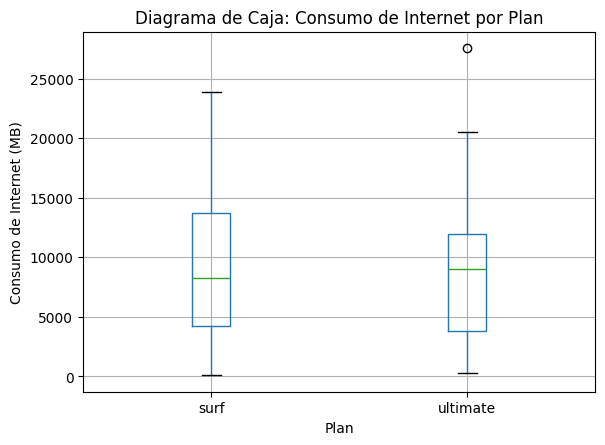

In [91]:
tarifa_1.boxplot(column="mb_used", by="plan_name")
plt.title("Diagrama de Caja: Consumo de Internet por Plan")
plt.suptitle("") 
plt.xlabel("Plan")
plt.ylabel("Consumo de Internet (MB)")
plt.show()


### Internet

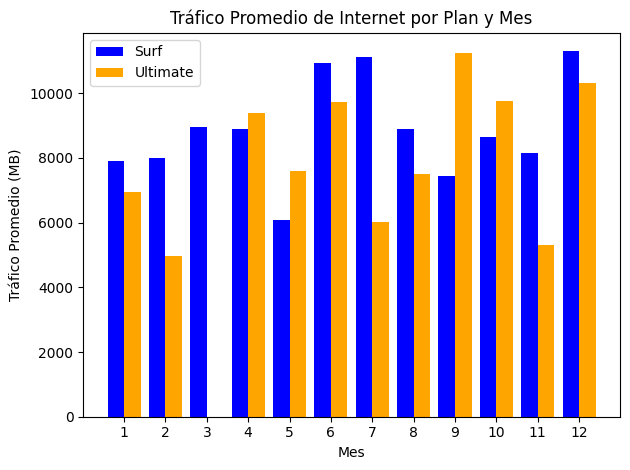

In [92]:

internet_promedio = tarifa_1.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
internet_promedio_f = internet_promedio.round(2)


pivot_data = internet_promedio_f.pivot(index="month", columns="plan", values="mb_used").fillna(0)


meses = pivot_data.index
ancho = 0.40
x = np.arange(len(meses))

plt.bar(x - ancho/2, pivot_data["surf"], width=ancho, label="Surf", color='blue')
plt.bar(x + ancho/2, pivot_data["ultimate"], width=ancho, label="Ultimate", color='orange')

plt.title("Tráfico Promedio de Internet por Plan y Mes")
plt.xlabel("Mes")
plt.ylabel("Tráfico Promedio (MB)")
plt.xticks(x, meses)
plt.legend()
plt.tight_layout()
plt.show()


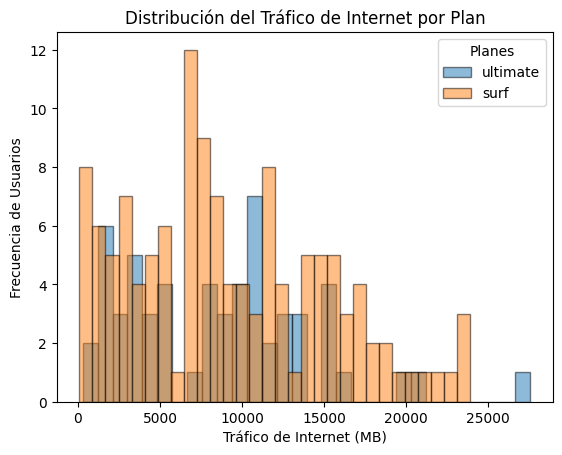

In [93]:

planes = tarifa_1["plan_name"].unique()

for plan in planes:
    datos_plan = tarifa_1[tarifa_1["plan_name"] == plan]
    plt.hist(datos_plan["mb_used"], bins=30, alpha=0.5, label=plan, edgecolor='black')


plt.title("Distribución del Tráfico de Internet por Plan")
plt.xlabel("Tráfico de Internet (MB)")
plt.ylabel("Frecuencia de Usuarios")
plt.legend(title="Planes")
plt.show()


In [94]:
# Calcular la media y varianza por plan
estadisticas_por_plan = tarifa_1.groupby("plan_name")["mb_used"].agg(["mean", "var"])
print(estadisticas_por_plan)


                  mean           var
plan_name                           
surf       9241.557188  3.668906e+07
ultimate   8654.625172  3.158246e+07


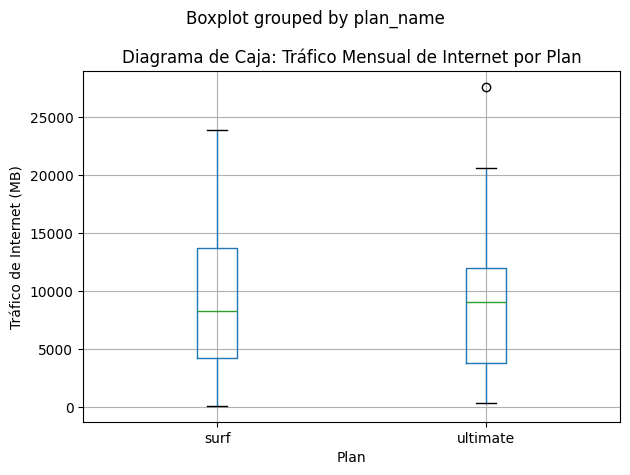

In [96]:
# Crear el diagrama de caja
tarifa_1.boxplot(column="mb_used", by="plan_name", )


plt.title("Diagrama de Caja: Tráfico Mensual de Internet por Plan")
plt.xlabel("Plan")
plt.ylabel("Tráfico de Internet (MB)")
plt.tight_layout()
plt.show()


## Ingreso

In [97]:
# mean and var 
estadisticas_por_plan = tarifa_1.groupby("plan_name")["ingresos_mensuales"].agg(["mean", "var"])
print(estadisticas_por_plan)


                mean         var
plan_name                       
surf       26.069872  290.130762
ultimate   70.000000    0.000000


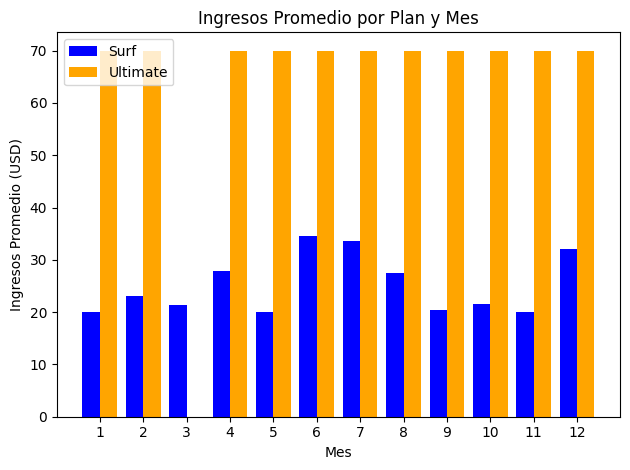

In [98]:
ingresos_promedio = tarifa_1.groupby(['plan', 'month'])['ingresos_mensuales'].mean().reset_index()
ingresos_promedio_f = ingresos_promedio.round(2)

pivot_data = ingresos_promedio_f.pivot(index="month", columns="plan", values="ingresos_mensuales").fillna(0)

meses = pivot_data.index
ancho = 0.40
x = np.arange(len(meses))

plt.bar(x - ancho/2, pivot_data["surf"], width=ancho, label="Surf", color='blue')
plt.bar(x + ancho/2, pivot_data["ultimate"], width=ancho, label="Ultimate", color='orange')


plt.title("Ingresos Promedio por Plan y Mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos Promedio (USD)")
plt.xticks(x, meses)
plt.legend()
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

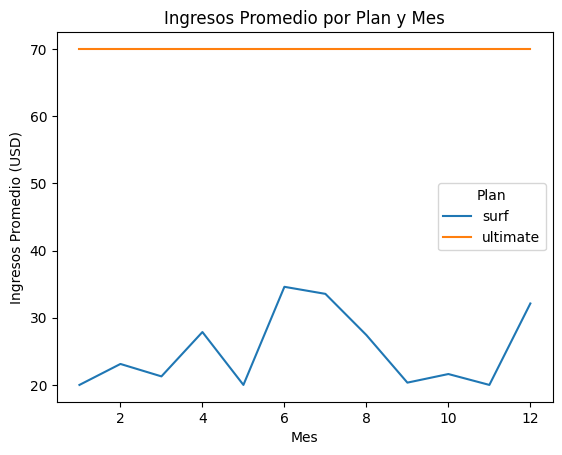

In [99]:
ingresos_promedio = tarifa_1.groupby(['plan', 'month'])['ingresos_mensuales'].mean().reset_index()
ingresos_promedio_f = ingresos_promedio.round(2)


for plan in ingresos_promedio_f["plan"].unique():
    datos_plan = ingresos_promedio_f[ingresos_promedio_f["plan"] == plan]
    plt.plot(datos_plan["month"], datos_plan["ingresos_mensuales"], label=plan)


plt.title("Ingresos Promedio por Plan y Mes")
plt.xlabel("Mes")
plt.ylabel("Ingresos Promedio (USD)")
plt.legend(title="Plan")
plt.grid

los ingresos de ultimate tienden a ser estables esto nos dice los beneficios de son suficientes

## Prueba las hipótesis estadísticas

### Hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

In [103]:
surf_mb_l = tarifa_1[tarifa_1["plan"]=="surf" ]
surf_mb = surf_mb_l["ingresos_mensuales"]
surf_mb.head()




1    20.000000
2    20.000000
3    20.000000
6    20.000000
7    41.390781
Name: ingresos_mensuales, dtype: float64

In [104]:
ultimate_mb_l = tarifa_1[tarifa_1["plan"]=="ultimate" ]
ultimate_mb = ultimate_mb_l["ingresos_mensuales"]
ultimate_mb.head()

0     70.0
4     70.0
5     70.0
13    70.0
14    70.0
Name: ingresos_mensuales, dtype: float64

In [105]:
alpha = 0.05  

results = st.ttest_ind(surf_mb, ultimate_mb, equal_var=False)

print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias de los dos grupos son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las medias de los dos grupos no son significativamente diferentes.")

Valor p: 3.7342340794814666e-58
Rechazamos la hipótesis nula: las medias de los dos grupos son significativamente diferentes.


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


- Hipótesis de que los ingresos promedio generados por los usuarios del plan Ultimate son diferentes a los generados por los usuarios del plan Surf.


 ### Hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [106]:
# Prueba las hipótesis
NY_NJ_l = tarifa_1[(tarifa_1["city"] == "New York-Newark-Jersey City, NY-NJ-PA MSA")]
NY_NJ = NY_NJ_l["ingresos_mensuales"]
NY_NJ.head()


6     20.0
14    70.0
15    20.0
17    70.0
18    20.0
Name: ingresos_mensuales, dtype: float64

In [107]:
sin_NY_NJ_l = tarifa_1[(tarifa_1["city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA")]
sin_NY_NJ = sin_NY_NJ_l["ingresos_mensuales"]
sin_NY_NJ.head()

0    70.0
1    20.0
2    20.0
3    20.0
4    70.0
Name: ingresos_mensuales, dtype: float64

In [108]:
alpha = 0.05  

results = st.ttest_ind(NY_NJ, sin_NY_NJ, equal_var=False)

print("Valor p:", results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias de los dos grupos son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las medias de los dos grupos no son significativamente diferentes.")

Valor p: 0.9454840902624039
No podemos rechazar la hipótesis nula: las medias de los dos grupos no son significativamente diferentes.


Según los datos, no se encontró evidencia suficiente para decir que los ingresos promedio son diferentes entre NY-NJ y otras regiones. 

## Conclusión general

Según el análisis, podemos indagar en que el plan Ultimate tiende a tener unos ingresos más fijos, ya que este es lo suficiente para los usuarios, y que en el plan Surf se consumen los mensajes, minutos de llamada y MB, entonces tienden a tener un sobrecargo en su pago mensual. 